In [1]:
import numpy as np
from nozzle import Spectral, Params, Nozzle, Boundary
import matplotlib.pyplot as plt

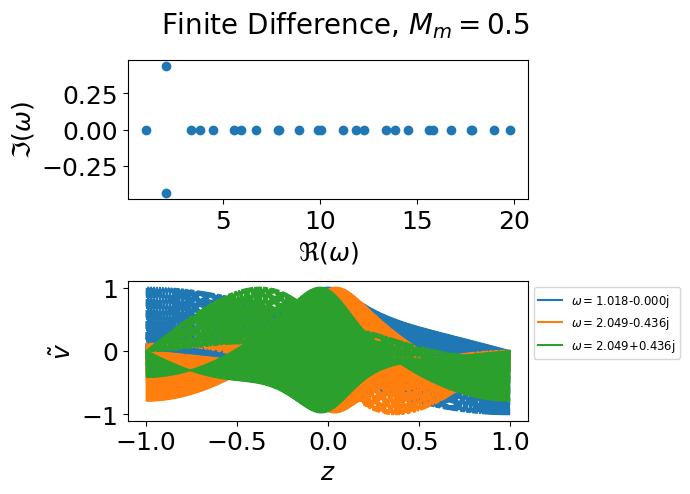

In [9]:
N = 501
Mm = 0.5
constant_v = False
accelerating = False
boundary = Boundary.FIXED_FIXED

params = Params(Mm, constant_v, accelerating, boundary)
spectral = Spectral(N, "symmetric", "FD")
nozzle = Nozzle(params, spectral.x)

x = spectral.x
D = spectral.D1
v0 = nozzle.v0
v0_p = D@v0

A11 = -np.diag(v0 + 1)@D - 0.5*np.diag(v0_p*(1-1/v0))
A12 = -0.5*np.diag(v0_p*(1-1/v0))
A21 = 0.5*np.diag(v0_p*(1+1/v0))
A22 = -np.diag(v0 - 1)@D + 0.5*np.diag(v0_p*(1+1/v0))

A = 1j*np.block([[A11[1:-1,1:-1], A12[1:-1,1:-1]],[A21[1:-1,1:-1], A22[1:-1,1:-1]]])
nozzle.omega, Y = np.linalg.eig(A)
Ym, Yp = Y[:int(Y.shape[0]/2)], Y[int(Y.shape[0]/2):]
V = (Ym+Yp)/2
nozzle.V = np.pad(V, ((1,1),(0,0))) # pad two ends by 0
nozzle.sort_solutions(real_range=[0,20], imag_range=[-2,2])

fig, ax = plt.subplots(2,1, figsize=(7,5))
nozzle.plot_eigenvalues(ax=ax[0])
nozzle.plot_eigenfunctions(num_funcs=3,ax=ax[1])
ax[1].legend(fontsize="small", bbox_to_anchor=(1,1))
fig.suptitle(f"Finite Difference, $M_m={Mm}$")
plt.tight_layout()